In [1]:
import pandas as pd
import time
from datetime import date, datetime
import matplotlib.pyplot as plt
import yfinance as yf
import pickle
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
#run the following command on the terminal: 
#pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow,Flow
from google.auth.transport.requests import Request

In [3]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# here enter the id of your google sheet
SAMPLE_SPREADSHEET_ID_input = '1Th9C5jOsPxDJtGYditB2ZOdCXGi834MSWbPaO9aDxhI'
SAMPLE_RANGE_NAME = 'A1:H1000'

In [4]:
global values_input, service

creds = None
# if os.path.exists('token.pickle'):
#     with open('token.pickle', 'rb') as token:
#         creds = pickle.load(token)
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'creds.json', SCOPES) # here enter the name of your downloaded JSON file
        creds = flow.run_local_server(port=0)
    # with open('token.pickle', 'wb') as token:
    #     pickle.dump(creds, token)

service = build('sheets', 'v4', credentials=creds)

# Call the Sheets API
sheet = service.spreadsheets()
result_input = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID_input,
                            range=SAMPLE_RANGE_NAME).execute()
values_input = result_input.get('values', [])

if not values_input and not values_expansion:
    print('No data found.')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=520015046348-8vikaieamv5kfda2bgq4msn0kmso57s7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A58289%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets&state=JntoiGpbFSeMUhV3JXlM8NaKv6Smyu&access_type=offline


In [5]:
df = pd.DataFrame(values_input.copy())
df = df.rename(columns = df.iloc[0])
df = df.drop(df.index[0])
df.head()

,Tarih,H/F,Hisse,Alış / Satış,Fiyat,Adet,Tutar,Kurtaj
1,20220101,Fon,TGE,Alış,0.0500,85000,"4,250.00",0.00
2,20220101,Fon,GUH,Alış,0.0800,59753,"4,780.24",0.00
3,20220101,Fon,GBG,Alış,0.1100,32000,"3,520.00",0.00
4,20220101,Fon,AFT,Alış,0.1600,168361,"26,937.76",0.00
5,20220101,Fon,AFA,Alış,0.2300,61414,"14,125.22",0.00


In [6]:
stock_list = list(df.Hisse.unique())
stock_list = [stock for stock in stock_list if len(stock) >= 4]
stock_list.remove('DHER')
stock_list.remove('IST:SISE')
stock_list.append('SISE')
len(stock_list)

28

In [7]:
start_date = '2022-01-01'
end_date = str(pd.Timestamp.today())[:10]
stock_list_is = [stock + '.IS' for stock in stock_list]
stock_list_ult = " ".join(stock_list_is)


In [8]:
price_data = pd.DataFrame(yf.download(stock_list_ult, start_date, end_date)['Close'])
price_data = round(price_data,2).reset_index()

[*********************100%***********************]  28 of 28 completed

1 Failed download:
- GESAN.IS: No data found for this date range, symbol may be delisted


In [9]:
price_data.columns = [stock[:-3] for stock in list(price_data.columns)]
price_data = price_data.rename(columns = {'D':'Date'})
price_data.head()

,Date,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
0,2021-12-31,16.87,48.40,7.33,20.88,61.30,29.10,18.69,1758.0,28.16,238.1,16.89,NaN,4.22,28.38,12.37,31.50,7.80,26.42,13.38,18.46,20.24,75.70,9.63,224.0,154.4,7.88,25.04,11.12
1,2022-01-03,17.26,49.84,7.41,21.80,64.45,29.86,18.77,1800.0,29.24,251.8,17.27,NaN,4.27,30.26,12.92,34.00,8.08,26.62,13.86,19.09,21.10,82.95,9.92,227.3,166.3,8.06,26.58,11.37
2,2022-01-04,17.71,50.75,7.32,22.50,67.70,30.00,18.60,1855.0,30.22,254.6,17.34,NaN,4.60,30.56,13.18,34.30,8.19,27.73,14.26,19.64,21.78,84.70,10.18,226.5,169.5,8.07,27.06,11.52
3,2022-01-05,17.74,51.70,7.30,23.02,69.30,29.82,18.68,1786.2,30.86,260.9,17.09,NaN,4.54,31.42,13.57,34.20,8.84,27.80,14.41,20.16,22.62,88.80,10.86,228.7,178.9,8.02,26.92,11.60
4,2022-01-06,17.71,51.40,7.14,23.26,68.95,29.32,18.52,1771.6,30.20,258.8,16.57,NaN,4.46,32.08,14.28,35.26,9.38,27.40,14.85,19.70,22.22,87.40,10.77,225.0,186.9,7.92,26.42,11.69


In [15]:
# data.loc[data.index < '2021-10-25', 'VESBE.IS'] = data.loc[data.index < '2021-10-25', 'VESBE.IS']*(8.4211)
# data.loc[data.index < '2021-08-31', 'GEDZA.IS'] = data.loc[data.index < '2021-08-31', 'GEDZA.IS']*(2)
# data.loc[data.index < '2021-04-30', 'HEKTS.IS'] = data.loc[data.index < '2021-04-30', 'HEKTS.IS']*(2.7577)

dividend = pd.DataFrame(columns = ['Date','Dividends','Stock Splits','Stock'])
for stock in stock_list:
    temp = pd.DataFrame(yf.Ticker(stock + ".IS").actions).reset_index()
    temp['Stock'] = stock
    dividend = pd.concat([dividend, temp], axis = 0)

dividend.columns = ['Date','Dividends','Stock_Splits','Stock','index']
dividend['Date'] = dividend['Date'].astype('str')
dividend['Date'] = dividend['Date'].str[:10]
dividend = dividend[dividend.Date >= '2022-01-01']
dividend = dividend.iloc[:,:4].sort_values(['Stock','Date'])
dividend['Dividends'] = dividend['Dividends'].astype('float64')
dividend['Stock_Splits'] = dividend['Stock_Splits'].astype('float64')
stock_splits = dividend[dividend.Stock_Splits > 0]
dividend = dividend[dividend.Dividends > 0]


- GESAN.IS: 1d data not available for startTime=-2208994789 and endTime=1669406013. Only 100 years worth of day granularity data are allowed to be fetched per request.


In [16]:
stock_splits['Bedelli'] = 0
stock_splits.loc[(stock_splits.Date == '2022-10-12') & (stock_splits.Stock == 'HEKTS'),'Bedelli'] = 1.50
stock_splits['Total_Split'] = stock_splits['Bedelli'] + stock_splits['Stock_Splits']


In [19]:
# ben temettüler hesaba katılmamıştır diye düşündüm ama hesaba katılıyomuş...
# burası bedelsiz için. 

for i in range(0,len(stock_splits)):
     price_data.loc[price_data.Date.astype(str) < stock_splits.iloc[i,0], stock_splits.iloc[i,3] ] = price_data.loc[price_data.Date.astype(str) < stock_splits.iloc[i,0], stock_splits.iloc[i,3] ] * stock_splits.iloc[i,5]

In [20]:
price_data.head(1)

,Date,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
0,2021-12-31,16.87,48.4,7.33,20.88,61.3,29.1,18.69,1758.0,28.16,238.1,16.89,NaN,12.4068,28.38,64.9425,31.5,7.8,52.84,13.38,18.46,20.24,75.7,9.63,224.0,154.4,7.88,25.04,11.12


In [21]:
stock_list = list(price_data.columns)[1:]

In [22]:
trans = df[df.iloc[:,1] == 'Hisse']
col_list = [col for col in list(trans.columns) if col != 'H/F']
trans = trans[col_list]

trans.columns = ["Date","Stock","Buy/Sell","Price","Lots","Amount","Commission"]
trans = trans.dropna()
trans.reset_index(inplace = True, drop = True)

In [23]:
lots = pd.DataFrame(columns = list(price_data.columns)[1:], index = price_data.Date).reset_index()
lots['Date'] = lots['Date'].astype(str)

In [24]:
trans.Date = trans.Date.str[0:4]+'-'+trans.Date.str[4:6]+'-'+trans.Date.str[6:8]
trans['Amount'] = trans['Amount'].str.replace(',','')
trans['Lots'] = trans['Lots'].astype('float64')
trans['Amount'] = trans['Amount'].astype('float64')
trans['Commission'] = trans['Commission'].astype('float64')
trans.Stock = trans.Stock.replace("IST:SISE","SISE")

In [25]:
for i in range(0,len(lots)):
    for j in range(0,len(stock_list)):
        lots.iloc[i,j+1] = trans[(trans['Date'] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Alış")]["Lots"].sum() \
                        -trans[(trans['Date'] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Satış")]["Lots"].sum()   

                     

In [26]:
expenses = pd.DataFrame(columns = list(price_data.columns)[1:], index = price_data.Date).reset_index()
expenses['Date'] = expenses['Date'].astype(str)

In [27]:
#204,20
for i in range(0,len(lots)):
    for j in range(0,len(stock_list)):
        expenses.iloc[i,j+1] = trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Alış")]["Amount"].sum() \
                              -trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Satış")]["Amount"].sum() \
                              +trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j])]["Commission"].sum() \
                              -trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "TMTTU")]["Amount"].sum()



In [28]:
lots.set_index('Date', inplace = True)
price_data.set_index('Date', inplace = True)
price_data = price_data.fillna(0)
price_data.head(1)

,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31,16.87,48.4,7.33,20.88,61.3,29.1,18.69,1758.0,28.16,238.1,16.89,0.0,12.4068,28.38,64.9425,31.5,7.8,52.84,13.38,18.46,20.24,75.7,9.63,224.0,154.4,7.88,25.04,11.12


In [29]:
lot_pri = pd.DataFrame(price_data.values*lots.values, columns=price_data.columns, index=price_data.index)

In [30]:
expenses[expenses.columns[1:]] = expenses[expenses.columns[1:]].astype('float64')

In [31]:
expenses = expenses.set_index('Date')

In [32]:
profit = pd.DataFrame(lot_pri.values-expenses.values, columns=lot_pri.columns, index=lot_pri.index)
profit["TOTAL"] = profit.sum(axis = 1)
profit["Daily"] = profit["TOTAL"].diff()


In [34]:
profit.head(5)

,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS,TOTAL,Daily
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN
2022-01-03,0.0,127.33,29.87,377.29,205.8,22.35,0.0,0.0,506.04,271.52,48.26,0.0,-302.116,188.39,0.0,0.0,82.78,0.0,342.96,21.71,59.46,648.96,185.25,0.0,709.18,60.69,129.79,50.06,3765.574,3765.574
2022-01-04,0.0,209.23,-5.41,667.79,420.3,26.55,0.0,0.0,971.54,327.52,57.36,0.0,-175.99,218.69,0.0,0.0,115.78,0.0,632.96,40.96,107.06,806.46,354.25,0.0,901.18,64.14,170.59,80.81,5991.770,2226.196
2022-01-05,0.0,294.73,-13.25,883.59,525.9,21.15,0.0,0.0,1275.54,453.52,24.86,0.0,-198.922,305.55,0.0,0.0,310.78,0.0,741.71,59.16,165.86,1175.46,796.25,0.0,1465.18,46.82,158.69,97.21,8589.788,2598.018
2022-01-06,0.0,267.73,-75.97,983.19,502.8,6.15,0.0,0.0,962.04,411.52,-42.74,0.0,-229.498,372.21,0.0,0.0,472.78,0.0,1060.71,43.06,137.86,1049.46,737.75,0.0,1945.18,11.82,116.19,115.66,8847.902,258.114


In [38]:
price_data.tail(3)

,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-22,39.00,88.45,9.45,42.60,131.7,51.30,48.16,3577.4,40.70,442.9,30.00,0.0,41.14,68.20,211.3,71.3,16.19,149.4,37.34,32.72,38.60,128.8,15.17,489.2,471.0,10.13,45.36,24.34
2022-11-23,39.50,90.35,10.10,43.98,130.0,52.50,50.30,3935.1,41.44,445.7,31.48,0.0,40.56,68.35,211.0,71.7,16.83,151.2,38.50,32.90,39.36,135.0,15.57,509.4,471.1,10.44,46.92,24.18
2022-11-24,40.62,91.40,10.36,45.90,132.6,53.75,52.55,4183.4,41.48,441.8,31.28,0.0,37.96,68.60,193.0,74.5,16.70,142.4,38.20,34.30,40.72,134.0,17.12,501.8,467.7,11.43,49.72,24.98


In [37]:
price_data.loc['2022-03-31','HEKTS']

14.8176

In [43]:
lot_pri.tail(1).sum(axis = 1)

Date
2022-11-24    516856.05
dtype: float64

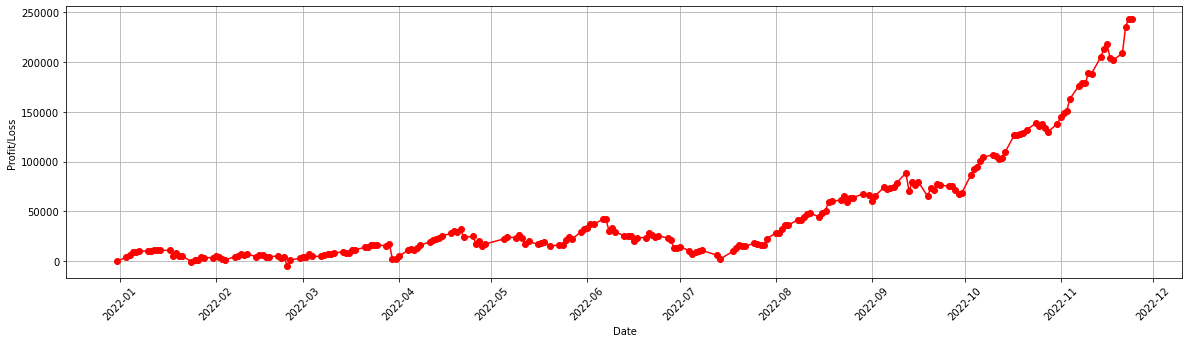

In [35]:
from matplotlib.pyplot import figure
plt.figure(figsize=(20,5))
plt.plot(profit["TOTAL"], linestyle = '-', marker = 'o', color = "red" )
plt.xticks(rotation = 45)
plt.grid()
plt.xlabel("Date") 
plt.ylabel("Profit/Loss")
plt.show()

In [ ]:
## Daily Profits/Losses
df["DAILY"] = df["PORTFOLIO"].diff()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[df["DAILY"].isnull() == False]["DAILY"].tail())